1. Normalize an image using the following steps:

Loads an image in grayscale mode using OpenCV.
Converts the image to floating point representation for calculations.
Calculates the minimum and maximum pixel values in the image.
Normalizes the image using the formula ((image_float - min_val) / (max_val - min_val))*R. 
if R=256, it will Scale the normalized image to the 0-255 range.
Displays the original and normalized images using OpenCV.
    
2.  Image Encryption: Encrypt the image

Load the input grayscale image using an image processing library like OpenCV.
Generate a random key matrix of the same size as the input image. Each element in the key matrix should be a random integer between 0 and 255.
Perform element-wise addition of the input image and the key matrix.
Take the modulo 256 of each sum to ensure the result stays within the 0-255 range.
The resulting matrix represents the encrepted image.

3. Decryption: Decrypt the Image

Perform element-wise subtraction of the encrypted image and the key matrix.
Take the modulo 256 of each difference to ensure the result stays within the 0-255 range.The resulting matrix represents the decrypted image.
Display the original input image, the encrypted image, and the decrypted image for comparison.

Verify that the decrypted image matches the original input image, confirming the correctness of the encryption and decryption process.

Note: make separate function for each problem and call it as per need.

import cv2
import numpy as np

def decrypt_image(encrypted_image, key_matrix):
    # Perform element-wise subtraction of encrypted image and key matrix
    decrypted_image = cv2.subtract(encrypted_image, key_matrix)

    # Take modulo 256 of each difference to ensure result stays within 0-255 range
    decrypted_image = np.mod(decrypted_image, 256)

    return decrypted_image

# Example usage
input_encrypted_image_path = 'encrypted_image.jpg'  # Change this to the path of your encrypted image
input_key_matrix_path = 'key_matrix.npy'  # Change this to the path of your key matrix file

# Load encrypted image and key matrix
encrypted_image = cv2.imread(input_encrypted_image_path, cv2.IMREAD_GRAYSCALE)
key_matrix = np.load(input_key_matrix_path)

# Decrypt the encrypted image
decrypted_image = decrypt_image(encrypted_image, key_matrix)

# Display the decrypted image
cv2.imshow('Decrypted Image', decrypted_image)
cv2.waitKey(0)
cv2.destroyAllWindows()


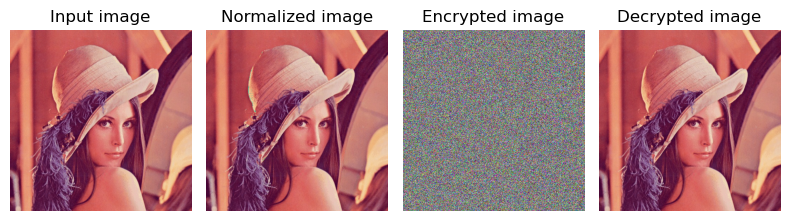

In [125]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def norm_image(image, R=256):
    image_float = image.astype(np.float32)
    min_val = np.min(image_float)
    max_val = np.max(image_float)
    
    normalized_image = ((image_float - min_val) / (max_val - min_val))*R
    normalized_image = normalized_image.astype(np.uint8)
    
    return normalized_image


key_matrix = np.random.randint(0, 256, size = input_image.shape, dtype=np.uint8)


def encrypt_image(image, key):
    encrypt_image = np.add(image, key)
    encrypt_image = np.mod(encrypt_image, 256)
    return encrypt_image

def decrypt_image(encrypted_image, key_matrix):
    # Ensure both arrays have the same data type
    encrypted_image = encrypted_image.astype(np.int16)
    key_matrix = key_matrix.astype(np.int16)
    
    # Perform element-wise subtraction of encrypted image and key matrix
    decrypted_image = cv2.subtract(encrypted_image, key_matrix)
    
    # Take modulo 256 of each difference to ensure result stays within 0-255 range
    decrypted_image = np.mod(decrypted_image, 256).astype(np.uint8)
    
    return decrypted_image

input_image = cv2.imread(r"C:\Users\HP\Desktop\DIPLAB\Testimage\Lenna.jpg")
input_image = cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB)
#input_image = cv2.resize(input_image, (512,512))

# Image normalization
normalized_image = norm_image(input_image)

# Image encryption
encrypted_image = encrypt_image(input_image, key_matrix)

# Image decryption
decrypted_image = decrypt_image(encrypted_image, key_matrix)

plt.figure(figsize=(8,3))
plt.subplot(1,4,1)
plt.title("Input image")
plt.imshow(input_image)
plt.axis('off')

plt.subplot(1,4,2)
plt.title("Normalized image")
plt.imshow(normalized_image)
plt.axis('off')

plt.subplot(1,4,3)
plt.title("Encrypted image")
plt.imshow(encrypted_image)
plt.axis('off')

plt.subplot(1,4,4)
plt.title("Decrypted image")
plt.imshow(decrypted_image)
plt.axis('off')

plt.tight_layout()
plt.show()
